In [ ]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
pd.set_option('display.max_rows', None)
import statistics
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = nc.Dataset('/content/drive/MyDrive/datasets/RF25_IMD0p252019.nc')

In [ ]:
time_data = data.variables['TIME'][:]
print(time_data)

[43100. 43101. 43102. 43103. 43104. 43105. 43106. 43107. 43108. 43109.
 43110. 43111. 43112. 43113. 43114. 43115. 43116. 43117. 43118. 43119.
 43120. 43121. 43122. 43123. 43124. 43125. 43126. 43127. 43128. 43129.
 43130. 43131. 43132. 43133. 43134. 43135. 43136. 43137. 43138. 43139.
 43140. 43141. 43142. 43143. 43144. 43145. 43146. 43147. 43148. 43149.
 43150. 43151. 43152. 43153. 43154. 43155. 43156. 43157. 43158. 43159.
 43160. 43161. 43162. 43163. 43164. 43165. 43166. 43167. 43168. 43169.
 43170. 43171. 43172. 43173. 43174. 43175. 43176. 43177. 43178. 43179.
 43180. 43181. 43182. 43183. 43184. 43185. 43186. 43187. 43188. 43189.
 43190. 43191. 43192. 43193. 43194. 43195. 43196. 43197. 43198. 43199.
 43200. 43201. 43202. 43203. 43204. 43205. 43206. 43207. 43208. 43209.
 43210. 43211. 43212. 43213. 43214. 43215. 43216. 43217. 43218. 43219.
 43220. 43221. 43222. 43223. 43224. 43225. 43226. 43227. 43228. 43229.
 43230. 43231. 43232. 43233. 43234. 43235. 43236. 43237. 43238. 43239.
 43240

In [ ]:
time = data.variables['TIME']
print(time)

<class 'netCDF4._netCDF4.Variable'>
float64 TIME(TIME)
    units: days since 1900-12-31 00:00:00
    axis: T
    calendar: GREGORIAN
    time_origin: 31-DEC-1900
    standard_name: time
unlimited dimensions: TIME
current shape = (365,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [ ]:
R = data.variables['RAINFALL']

In [ ]:
lon_data = data.variables['LONGITUDE'][:]

In [ ]:
lat_data = data.variables['LATITUDE'][:]

In [ ]:
start_date = '2019-01-01'
end_date = '2019-12-31'
date_range = pd.date_range(start =start_date, end= end_date)

In [ ]:
template = pd.DataFrame(0,columns=['Rainfall in mm'],index = date_range)

In [ ]:
in_c = np.arange(0,time.size)

In [ ]:
def findindexoflat(lat):
  sq_diff_lat = (lat_data-lat)**2
  min_index_lat = sq_diff_lat.argmin()
  return min_index_lat

In [ ]:
def findindexoflon(lon):
  sq_diff_lon = (lon_data-lon)**2
  min_index_lon = sq_diff_lon.argmin()
  return min_index_lon

In [ ]:
def convert(lat,lon,name):
  for i in in_c:
    template.iloc[i] = R[i,lat,lon]
  template.to_csv(name)

In [ ]:
latitude = [12.972442,17.686815,15.371598]
longitude=[77.580643,83.218483,75.101166]
for i in range(3):
  latitude_index = findindexoflat(latitude[i])
  longitude_index = findindexoflon(longitude[i])
  if(i==0):
    name = 'Rainfall_Bangalore.csv'
  elif(i==1):
    name = 'Rainfall_Vizag.csv'
  else:
    name = 'Rainfall_Hubli.csv'
  convert(latitude_index,longitude_index,name)

In [ ]:
blore_rainfall_dataset = pd.read_csv('/content/Rainfall_Bangalore.csv')
vizag_rainfall_dataset = pd.read_csv('/content/Rainfall_Vizag.csv')
hubli_rainfall_dataset = pd.read_csv('/content/Rainfall_Hubli.csv')

In [ ]:
blore_rainfall_dataset.columns = ['Date','Blore rainfall']
vizag_rainfall_dataset.columns = ['Date','Vizag rainfall']
hubli_rainfall_dataset.columns = ['Date','Hubli rainfall']

In [ ]:
dataset = blore_rainfall_dataset.copy()

In [ ]:
dataset['Vizag rainfall'] = vizag_rainfall_dataset['Vizag rainfall']
dataset['Hubli rainfall'] = hubli_rainfall_dataset['Hubli rainfall']

In [ ]:
dataset

,Date,Blore rainfall,Vizag rainfall,Hubli rainfall
0,2019-01-01,0.000000,0.000000,0.000000
1,2019-01-02,0.000000,0.000000,0.000000
2,2019-01-03,0.000000,0.000000,0.000000
3,2019-01-04,0.000000,0.000000,0.000000
4,2019-01-05,0.000000,0.000000,0.000000
5,2019-01-06,0.000000,0.000000,0.000000
6,2019-01-07,0.000000,0.000000,0.000000
7,2019-01-08,0.000000,0.000000,0.000000
8,2019-01-09,0.000000,0.000000,0.000000
9,2019-01-10,0.000000,0.000000,0.000000


In [ ]:
date = list(dataset['Date'])

In [ ]:
for i in range(len(date)):
  if(date[i][5:7]=='01'):
    date[i] = 'Jan'
  elif(date[i][5:7]=='02'):
    date[i] = 'Feb'
  elif(date[i][5:7]=='03'):
    date[i] = 'Mar'
  elif(date[i][5:7]=='04'):
    date[i] = 'Apr'
  elif(date[i][5:7]=='05'):
    date[i] = 'May'
  elif(date[i][5:7]=='06'):
    date[i] = 'Jun'
  elif(date[i][5:7]=='07'):
    date[i] = 'Jul'
  elif(date[i][5:7]=='08'):
    date[i] = 'Aug'
  elif(date[i][5:7]=='09'):
    date[i] = 'Sep'
  elif(date[i][5:7]=='10'):
    date[i] = 'Oct'
  elif(date[i][5:7]=='11'):
    date[i] = 'Nov'
  elif(date[i][5:7]=='12'):
    date[i] = 'Dec'

In [ ]:
dataset['Month'] = date

In [ ]:
x = list(dataset['Month'])
y1 = list(dataset['Blore rainfall'])
y2 = list(dataset['Vizag rainfall'])
y3 = list(dataset['Hubli rainfall'])

In [ ]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
blore_monthly_avg_list=[]
vizag_monthly_avg_list=[]
hubli_monthly_avg_list=[]
for i in range(len(month)):
  count=0
  blore_sum=0
  vizag_sum=0
  hubli_sum=0
  for j in range(len(x)):
    if(month[i]==x[j]):
      blore_sum+=y1[j]
      vizag_sum+=y2[j]
      hubli_sum+=y3[j]
      count+=1
  blore_monthly_avg_list.append(blore_sum/count)
  vizag_monthly_avg_list.append(vizag_sum/count)
  hubli_monthly_avg_list.append(hubli_sum/count)

In [ ]:
columns = ['Month','Blore monthly avg','Vizag monthly avg','Hubli monthly avg']
dataset_monthly_avg = pd.DataFrame(columns = columns)

In [ ]:
dataset_monthly_avg['Month']=month
dataset_monthly_avg['Blore monthly avg'] = blore_monthly_avg_list
dataset_monthly_avg['Vizag monthly avg'] = vizag_monthly_avg_list
dataset_monthly_avg['Hubli monthly avg'] = hubli_monthly_avg_list

In [ ]:
x = dataset_monthly_avg['Month']
y1 = dataset_monthly_avg['Blore monthly avg']
y2 = dataset_monthly_avg['Vizag monthly avg']
y3 = dataset_monthly_avg['Hubli monthly avg']

Text(0.5, 1.0, 'Average Rainfall in Bangalore per month 2019')

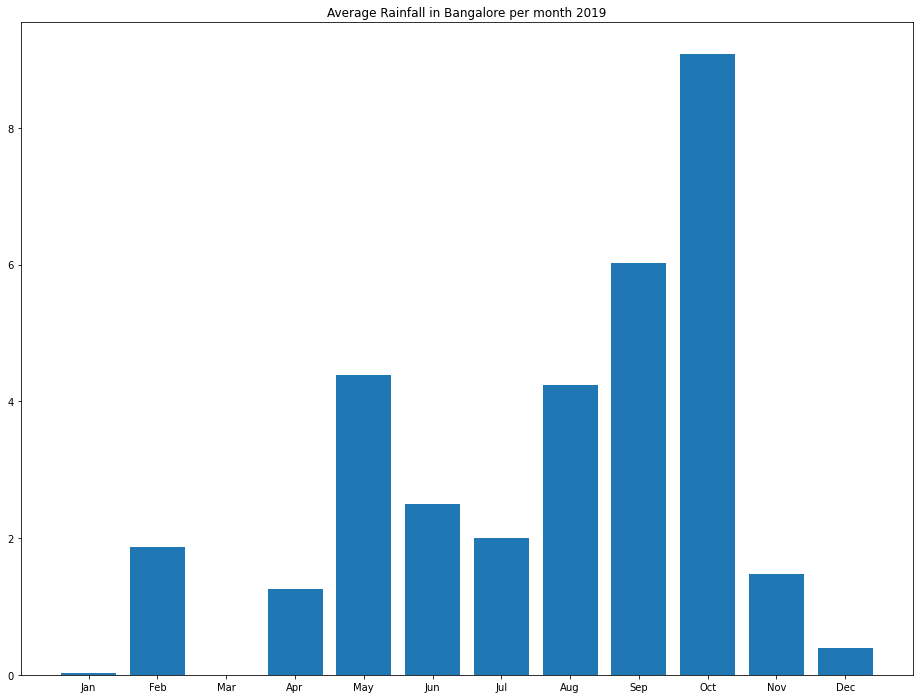

In [ ]:
plt.figure(figsize=(16,12))
plt.bar(x,y1)
plt.title('Average Rainfall in Bangalore per month 2019')

Text(0.5, 1.0, 'Rainfall in Vizag per month 2019')

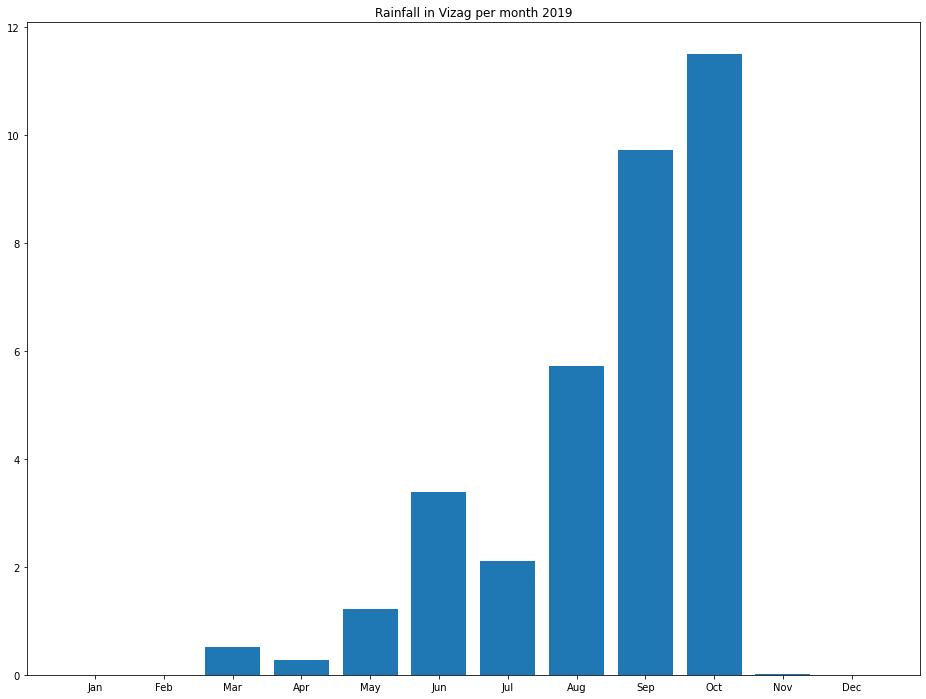

In [ ]:
plt.figure(figsize=(16,12))
plt.bar(x,y2)
plt.title('Rainfall in Vizag per month 2019')

Text(0.5, 1.0, 'Rainfall in Hubli per month 2019')

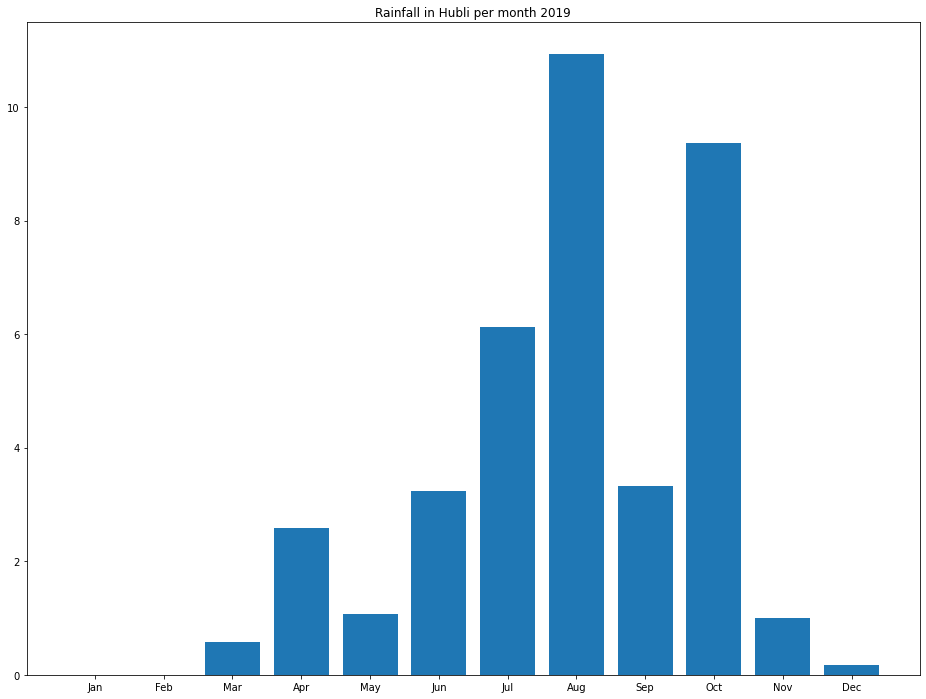

In [ ]:
plt.figure(figsize=(16,12))
plt.bar(x,y3)
plt.title('Rainfall in Hubli per month 2019')

In [ ]:
x = list(dataset['Month'])
y1 = list(dataset['Blore rainfall'])
y2 = list(dataset['Vizag rainfall'])
y3 = list(dataset['Hubli rainfall'])

In [ ]:
cities = ['Bangalore','Vizag','Hubli']
blore_rainfall = list(dataset['Blore rainfall'])
vizag_rainfall = list(dataset['Vizag rainfall'])
hubli_rainfall = list(dataset['Hubli rainfall'])

In [ ]:
sum_annual_rainfall = [sum(blore_rainfall),sum(vizag_rainfall),sum(hubli_rainfall)]

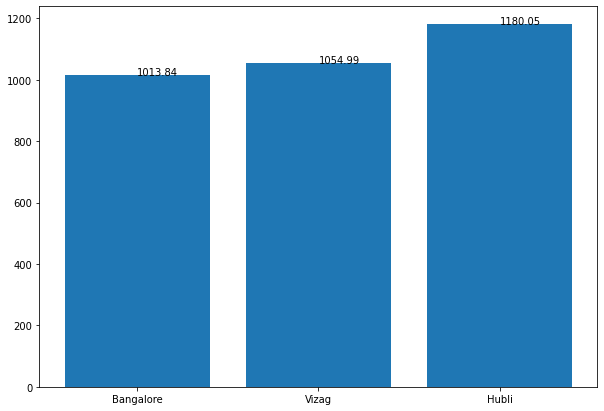

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(cities,sum_annual_rainfall)
for i in range(3):
  plt.text(i,sum_annual_rainfall[i],"{:.2f}".format(sum_annual_rainfall[i]))

In [ ]:
south_west = ['May','Jun','Jul','Aug','Sep']
blore_south_west=[]
hubli_south_west = []
vizag_south_west = []
for i in south_west:
  k=0
  b=0
  h=0
  v=0
  for j in range(len(date)):
    if(i==date[j]):
      k+=1
      b+=blore_rainfall[j]
      h+=hubli_rainfall[j]
      v+=vizag_rainfall[j]
      if(date[j+1]!=i):
        break
  blore_south_west.append(b/k)
  hubli_south_west.append(h/k)
  vizag_south_west.append(v/k)

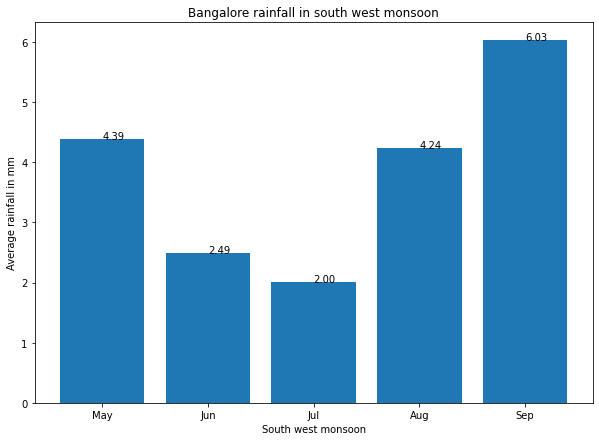

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Bangalore rainfall in south west monsoon')
plt.xlabel('South west monsoon')
plt.ylabel('Average rainfall in mm')
plt.bar(south_west,blore_south_west)
for i in range(len(south_west)):
  plt.text(i,blore_south_west[i],"{:.2f}".format(blore_south_west[i]))

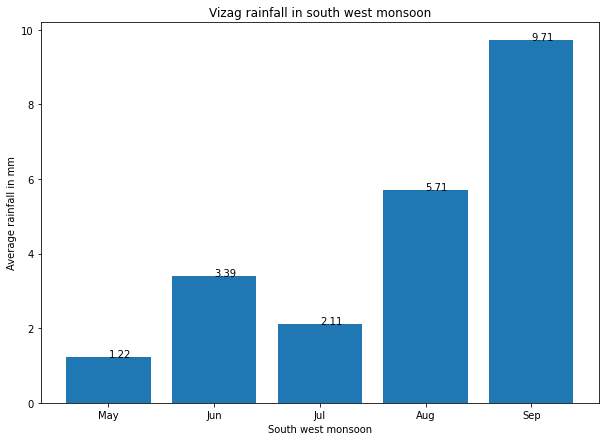

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Vizag rainfall in south west monsoon')
plt.xlabel('South west monsoon')
plt.ylabel('Average rainfall in mm')
plt.bar(south_west,vizag_south_west)
for i in range(len(south_west)):
  plt.text(i,vizag_south_west[i],"{:.2f}".format(vizag_south_west[i]))

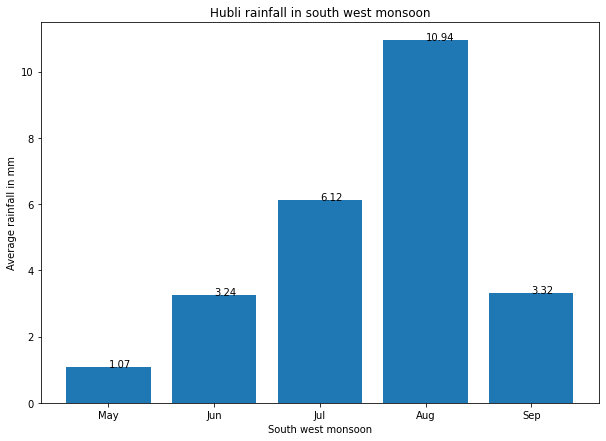

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Hubli rainfall in south west monsoon')
plt.xlabel('South west monsoon')
plt.ylabel('Average rainfall in mm')
plt.bar(south_west,hubli_south_west)
for i in range(len(south_west)):
  plt.text(i,hubli_south_west[i],"{:.2f}".format(hubli_south_west[i]))

In [ ]:
south_west_mean = [statistics.mean(blore_south_west),statistics.mean(vizag_south_west),statistics.mean(hubli_south_west)]

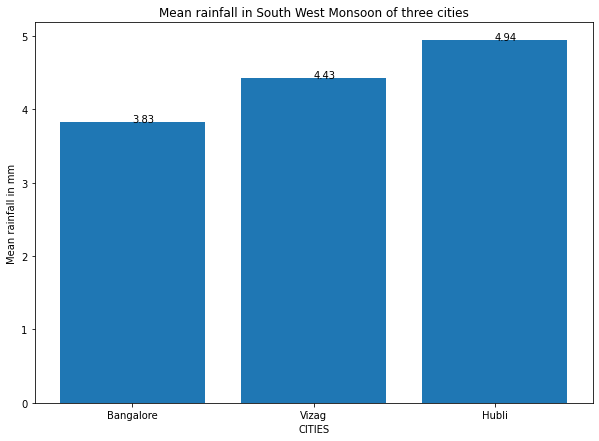

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Mean rainfall in South West Monsoon of three cities')
plt.xlabel('CITIES')
plt.ylabel('Mean rainfall in mm')
plt.bar(cities,south_west_mean)
for i in range(3):
  plt.text(i,south_west_mean[i],"{:.2f}".format(south_west_mean[i]))

In [ ]:
north_east = ['Oct','Nov','Dec']
blore_north_east=[]
hubli_north_east = []
vizag_north_east = []
for i in north_east:
  k=0
  b=0
  h=0
  v=0
  for j in range(len(date)):
    if(i==date[j]):
      k+=1
      b+=blore_rainfall[j]
      h+=hubli_rainfall[j]
      v+=vizag_rainfall[j]

  blore_north_east.append(b/k)
  hubli_north_east.append(h/k)
  vizag_north_east.append(v/k)

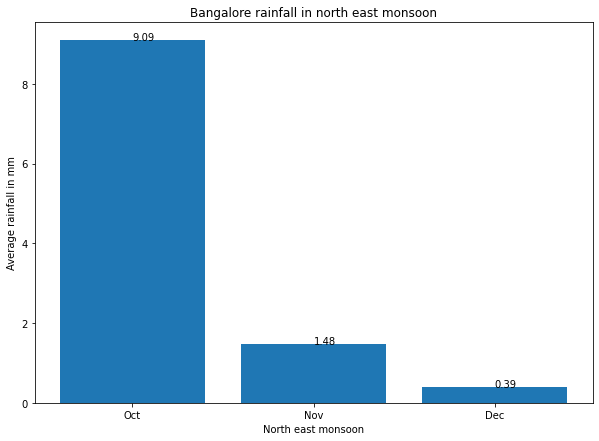

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Bangalore rainfall in north east monsoon')
plt.xlabel('North east monsoon')
plt.ylabel('Average rainfall in mm')
plt.bar(north_east,blore_north_east)
for i in range(len(north_east)):
  plt.text(i,blore_north_east[i],"{:.2f}".format(blore_north_east[i]))

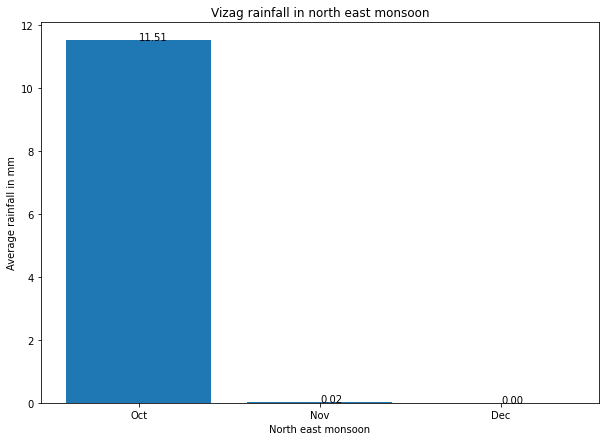

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Vizag rainfall in north east monsoon')
plt.xlabel('North east monsoon')
plt.ylabel('Average rainfall in mm')
plt.bar(north_east,vizag_north_east)
for i in range(len(north_east)):
  plt.text(i,vizag_north_east[i],"{:.2f}".format(vizag_north_east[i]))

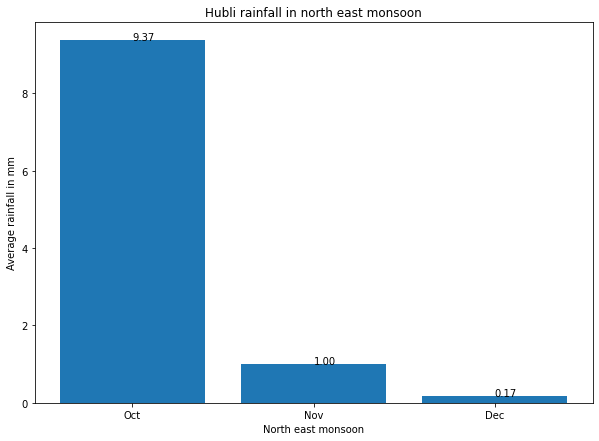

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Hubli rainfall in north east monsoon')
plt.xlabel('North east monsoon')
plt.ylabel('Average rainfall in mm')
plt.bar(north_east,hubli_north_east)
for i in range(len(north_east)):
  plt.text(i,hubli_north_east[i],"{:.2f}".format(hubli_north_east[i]))

In [ ]:
north_east_mean = [statistics.mean(blore_north_east),statistics.mean(vizag_north_east),statistics.mean(hubli_north_east)]

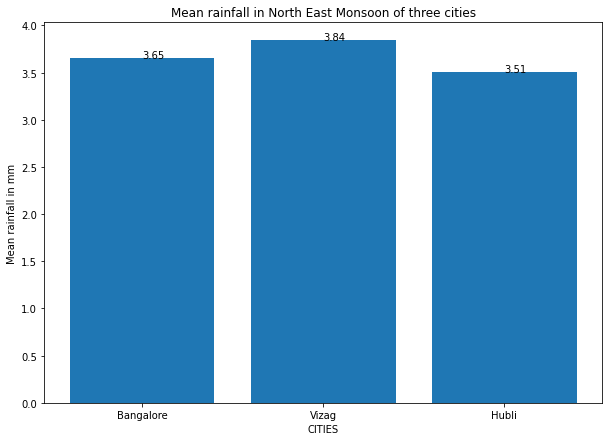

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Mean rainfall in North East Monsoon of three cities')
plt.xlabel('CITIES')
plt.ylabel('Mean rainfall in mm')
plt.bar(cities,north_east_mean)
for i in range(3):
  plt.text(i,north_east_mean[i],"{:.2f}".format(north_east_mean[i]))

In [ ]:
blore_variance = statistics.variance(blore_south_west)
hubli_variance = statistics.variance(hubli_south_west)
vizag_variance = statistics.variance(vizag_south_west)

In [ ]:
variance = [blore_variance,vizag_variance,hubli_variance]

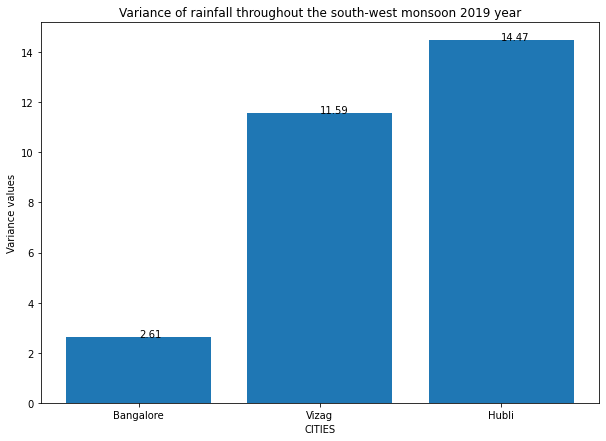

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Variance of rainfall throughout the south-west monsoon 2019 year')
plt.xlabel('CITIES')
plt.ylabel('Variance values')
plt.bar(cities,variance)
for i in range(3):
  plt.text(i,variance[i],"{:.2f}".format(variance[i]))

In [ ]:
blore_moving_avg = []
vizag_moving_avg = []
hubli_moving_avg = []
x=[]

In [ ]:
for i in range(363):
  x.append(i)

In [ ]:
print(len(blore_rainfall))

365


In [ ]:
for i in range(len(blore_rainfall)-2):
  l1 = blore_rainfall[i:i+3]
  blore_moving_avg.append(statistics.mean(l1))

In [ ]:
print(len(blore_moving_avg))

363


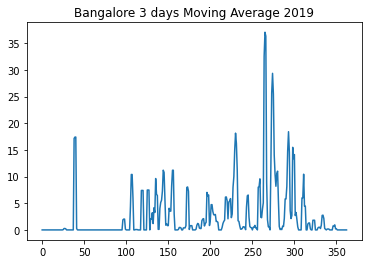

In [ ]:
plt.title('Bangalore 3 days Moving Average 2019')
plt.plot(x,blore_moving_avg)

In [ ]:
blore_mvg_avg_copy = sorted(blore_moving_avg,reverse=True)

In [ ]:
blore_three_max = blore_mvg_avg_copy[0:3]
blore_index=[]
for i in range(3):
  index=blore_moving_avg.index(blore_three_max[i])
  blore_moving_avg[index] = 0
  blore_index.append(index)
print(blore_index)

[265, 266, 264]


In [ ]:
for i in range(len(vizag_rainfall)-2):
  l1 = vizag_rainfall[i:i+3]
  vizag_moving_avg.append(statistics.mean(l1))

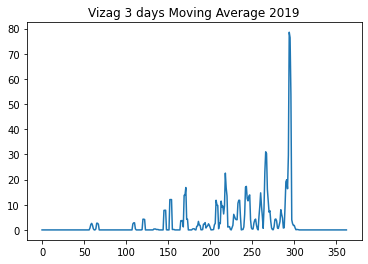

In [ ]:
plt.title('Vizag 3 days Moving Average 2019')
plt.plot(x,vizag_moving_avg)

In [ ]:
vizag_mvg_avg_copy = sorted(vizag_moving_avg,reverse=True)

In [ ]:
vizag_three_max = vizag_mvg_avg_copy[0:3]
vizag_index=[]
for i in range(3):
  index=vizag_moving_avg.index(vizag_three_max[i])
  vizag_moving_avg[index] = 0
  vizag_index.append(index)
print(vizag_index)

[294, 295, 296]


In [ ]:
for i in range(len(hubli_rainfall)-2):
  l1 = hubli_rainfall[i:i+3]
  hubli_moving_avg.append(statistics.mean(l1))

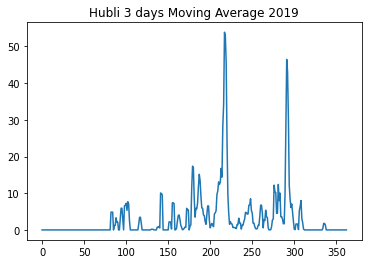

In [ ]:
plt.title('Hubli 3 days Moving Average 2019')
plt.plot(x,hubli_moving_avg)

In [ ]:
hubli_mvg_avg_copy = sorted(hubli_moving_avg,reverse=True)

In [ ]:
hubli_three_max = hubli_mvg_avg_copy[0:3]
hubli_index=[]
for i in range(3):
  index=hubli_moving_avg.index(hubli_three_max[i])
  hubli_moving_avg[index] = 0
  hubli_index.append(index)
print(hubli_index)

[217, 218, 291]
